In [33]:
from my_weapon import *

In [80]:
rsts = []

targets = {
    "IA": np.array([0.213, 0.247, 0.185, 0.149, 0.206]),
    "NH": np.array([0.243, 0.256, 0.092, 0.084, 0.325]),
    "NV": np.array([0.139, 0.468, 0.098, 0.204, 0.090])
}

options = [
    "7days", "14days", "21days", "culFrom01", "culFrom0115", "culFrom0201", "culFrom0215",
]

# For IA
def calc_error_IA():
    global rsts
    for option in options:
        try:
            data = pd.read_csv(f"data/csv/results-states-{option}-electionDays.csv").set_index("id")
#             print(option)
            # data = data.rename(columns={"0": "Pete Buttigieg", 
            #                             "1": "Bernie Sanders", 
            #                             "2": "Elizabeth Warren", 
            #                             "3": "Joe Biden", 
            #                             "4": "Others",
            #                             "5": "Mike Bloomberg"})
            data = data[(data["state"]=="IA") & (data["dt"]=="2020-02-03")]
#             print(data)
            data = data.T.to_dict()["IA:2020-02-03"]
        except:
            continue

        pred_MB = np.array([data['0'], data['1'], data['2'], data['3'], data['4'] + data['5']])
        pred_MB = pred_MB / sum(pred_MB)
#         print(pred_MB)
        pred = np.array([data['0'], data['1'], data['2'], data['3'], data['4']])
        pred = pred / sum(pred)

        r1 = np.linalg.norm(targ - pred_MB)
        r2 = np.linalg.norm(targ - pred)
        print(option, r1, r2)
        print(targ, pred_MB)
        print(targ, pred)
        
        rsts.append(
        {
            "state": "IA",
            "pars": option,
            "+MB": r1,
            "-MB": r2
        })
        
calc_error_IA()

7days 0.2695581637142064 0.27108821512737963
[0.139 0.468 0.098 0.204 0.09 ] [0.12956545 0.24926686 0.2111437  0.3129832  0.09704079]
[0.139 0.468 0.098 0.204 0.09 ] [0.13377374 0.25736306 0.21800165 0.32314891 0.06771263]
14days 0.21841483991968108 0.21919061441261445
[0.139 0.468 0.098 0.204 0.09 ] [0.11332282 0.30804099 0.2341348  0.25798187 0.08651951]
[0.139 0.468 0.098 0.204 0.09 ] [0.11571745 0.31455021 0.23908231 0.26343329 0.06721674]
21days 0.18584948489166972 0.18755861847699784
[0.139 0.468 0.098 0.204 0.09 ] [0.10205103 0.35717859 0.24028681 0.22494581 0.07553777]
[0.139 0.468 0.098 0.204 0.09 ] [0.10381679 0.36335878 0.24444444 0.228838   0.05954198]
culFrom01 0.1923407430569653 0.1940534782049544
[0.139 0.468 0.098 0.204 0.09 ] [0.09987216 0.35490572 0.24624481 0.22499201 0.0739853 ]
[0.139 0.468 0.098 0.204 0.09 ] [0.10146104 0.36055195 0.25016234 0.22857143 0.05925325]
culFrom0115 0.19743357944627296 0.1987629665010177
[0.139 0.468 0.098 0.204 0.09 ] [0.10426787 0.3400

In [5]:
#New Hampshire (Feb 11),24.3,25.6,9.2,11.7,31.1
targ = np.array([0.243, 0.256, 0.092, 0.117, 0.311])

# For NH
def calc_error_NH():
    for option in options:
        try:
            data = pd.read_csv(f"data/csv/results-states-{option}-electionDays.csv").set_index("id")
            data = data[(data["state"]=="NH") & (data["dt"]=="2020-02-11")]
            data = data.T.to_dict()["NH:2020-02-11"]
        except:
            continue

        pred_MB = np.array([data['0'], data['1'], data['2'], data['3'], data['4'] + data['5']])
        pred_MB = pred_MB / sum(pred_MB)

        pred = np.array([data['0'], data['1'], data['2'], data['3'], data['4']])
        pred = pred / sum(pred)

        r1 = np.linalg.norm(targ - pred_MB)
        r2 = np.linalg.norm(targ - pred)
        print(option, r1, r2)
        print(targ, pred_MB)
        print(targ, pred)
        
        rsts.append(
        {
            "state": "NH",
            "pars": option,
            "+MB": r1,
            "-MB": r2
        })
            
calc_error_NH()

7days 0.2154411309245699 0.2491394886136818
14days 0.23998702347323975 0.2709261032181717
21days 0.24614586324104062 0.2735240823341906
culFrom01 0.26529734770336916 0.28939318171275275
culFrom0115 0.25720082224330837 0.28235174929352375
culFrom0201 0.2172379880092572 0.25606592450558463


In [31]:
# Nevada (Feb 22),13.9,46.8,9.8,20.4,9.0
targ = np.array([0.139, 0.468, 0.098, 0.204, 0.090])

# For NV
def calc_error_NV():
    for option in options:
        try:
            data = pd.read_csv(f"data/csv/results-states-{option}-electionDays.csv").set_index("id")
            data = data[(data["state"]=="NV") & (data["dt"]=="2020-02-22")]
            data = data.T.to_dict()["NV:2020-02-22"]
        except:
            continue

        pred_MB = np.array([data['0'], data['1'], data['2'], data['3'], data['4'] + data['5']])
        pred_MB = pred_MB / sum(pred_MB)

        pred = np.array([data['0'], data['1'], data['2'], data['3'], data['4']])
        pred = pred / sum(pred)

        r1 = np.linalg.norm(targ - pred_MB)
        r2 = np.linalg.norm(targ - pred)
#         print(option, r1, r2)
        print(option, pred)
#         print(targ, pred)
        
        rsts.append(
        {
            "state": "NV",
            "pars": option,
            "+MB": r1,
            "-MB": r2
        })
    
calc_error_NV()

7days [0.14598385 0.3960901  0.25159371 0.14534637 0.06098598]
14days [0.17123602 0.39301578 0.21963547 0.15469444 0.06141829]
21days [0.1759736  0.3879868  0.20145215 0.17940594 0.05518152]
culFrom01 [0.12481614 0.404917   0.19625972 0.21958395 0.0544232 ]
culFrom0115 [0.13214947 0.39928097 0.18988997 0.22202854 0.05665105]
culFrom0201 [0.1759736  0.3879868  0.20145215 0.17940594 0.05518152]
culFrom0215 [0.14598385 0.3960901  0.25159371 0.14534637 0.06098598]


In [7]:
rsts = pd.DataFrame(rsts).set_index("pars")

In [8]:
rsts

,state,+MB,-MB
pars,,,
7days,IA,0.215436,0.238589
14days,IA,0.205496,0.222053
21days,IA,0.224263,0.238365
culFrom01,IA,0.226705,0.239682
culFrom0115,IA,0.216849,0.231773
culFrom0201,IA,0.148183,0.186157
7days,NH,0.215441,0.249139
14days,NH,0.239987,0.270926
21days,NH,0.246146,0.273524


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

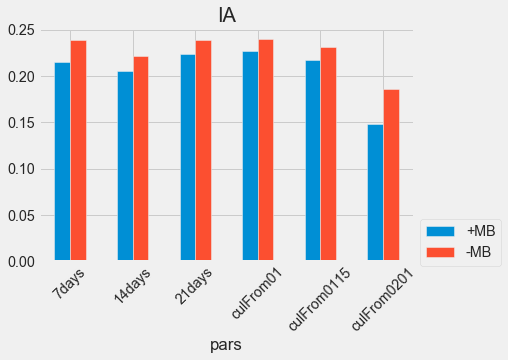

In [17]:
sns.set(style="white", font_scale=1.3)
plt.style.use('fivethirtyeight')
rsts[rsts.state=="IA"].plot.bar()
plt.title("IA")
plt.legend(loc=4, bbox_to_anchor=(1, -0.05, 0.25, 0.25))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

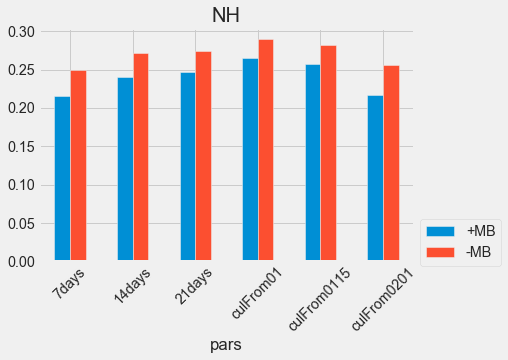

In [18]:
rsts[rsts.state=="NH"].plot.bar()
plt.title("NH")
plt.legend(loc=4, bbox_to_anchor=(1, -0.05, 0.25, 0.25))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

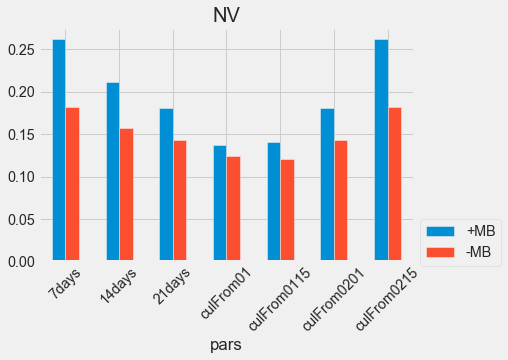

In [19]:
rsts[rsts.state=="NV"].plot.bar()
plt.title("NV")
plt.legend(loc=4, bbox_to_anchor=(1, -0.05, 0.25, 0.25))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

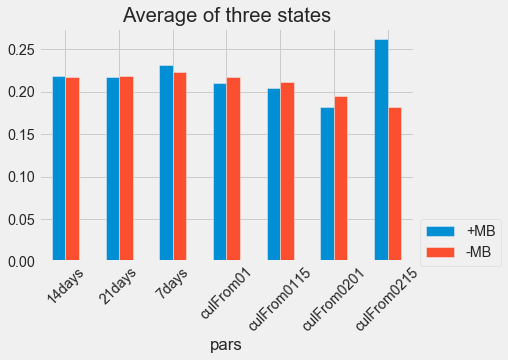

In [21]:
rsts.groupby("pars").mean().plot.bar()
plt.title("Average of three states")
plt.legend(loc=4, bbox_to_anchor=(1, -0.05, 0.25, 0.25))
plt.xticks(rotation=45)

In [91]:
def plot_error_t0(state):
    data = pd.read_csv(f"data/csv/results-t0-{state}.csv").set_index("days")
    data = data[["0", "1", "2", "3", "4"]]
    data = data.rename(columns={"0": "Pete Buttigieg", 
                                "1": "Bernie Sanders",
                                "2": "Elizabeth Warren", 
                                "3": "Joe Biden", 
                                "4": "Others",
                                "5": "Mike Bloomberg"})
    data.to_csv("nums.csv")
    print(data)
    data = data.div(data.sum(axis=1), axis=0)
    data.to_csv("percent.csv")
    data.plot()
    plt.legend(loc=4, bbox_to_anchor=(1.2, -0.05, 0.25, 0.25), frameon=False)
    plt.xlabel(f"Days to Election Day ({state}) -MB")
    plt.ylabel("Percent of Supporters")
    plt.show()
    plt.close()

    data_B = pd.read_csv(f"data/csv/results-t0-{state}.csv").set_index("days")
    data_B["4"] = data_B["4"] + data_B["5"]
    data_B = data_B[["0", "1", "2", "3", "4"]]
    data_B = data_B.rename(columns={"0": "Pete Buttigieg", 
                                "1": "Bernie Sanders", 
                                "2": "Elizabeth Warren", 
                                "3": "Joe Biden", 
                                "4": "Others",
                                "5": "Mike Bloomberg"})
    data_B = data_B.div(data_B.sum(axis=1), axis=0)
    data_B.plot()
    plt.legend(loc=4, bbox_to_anchor=(1.2, -0.05, 0.25, 0.25), frameon=False)
    plt.xlabel(f"Days to Election Day ({state}) +MB")
    plt.ylabel("Percent of Supporters")
    plt.show()
    plt.close()

    targ = np.array([0.139, 0.468, 0.098, 0.204, 0.090])
    rsts = []
    for i, row in data.iterrows():
    #     print(i, row)
        pred = np.array([
            row["Pete Buttigieg"],
            row["Bernie Sanders"],
            row["Elizabeth Warren"],
            row["Joe Biden"],
            row["Others"],
        ])
        err = np.linalg.norm(targ - pred)
        # print(i, err)
        rsts.append({
            "days": i,
            "-MB": err
        })
    for i, row in data_B.iterrows():
    #     print(i, row)
        pred = np.array([
            row["Pete Buttigieg"],
            row["Bernie Sanders"],
            row["Elizabeth Warren"],
            row["Joe Biden"],
            row["Others"],
        ])
        err = np.linalg.norm(targ - pred)
        # print(i, err)
        rsts.append({
            "days": i,
            "+MB": err
        })

    pd.DataFrame(rsts).set_index("days").plot()
    plt.legend(frameon=False)
    plt.xlabel(f"Days to Election Day ({state})")
    plt.ylabel("Error")
    plt.show()
    plt.close()

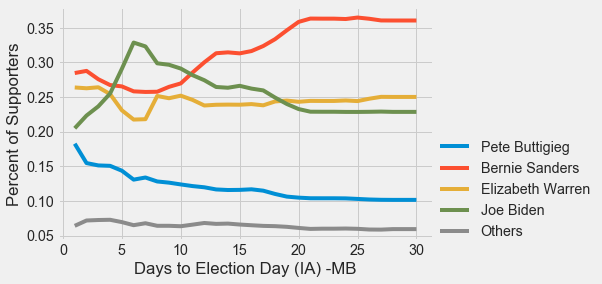

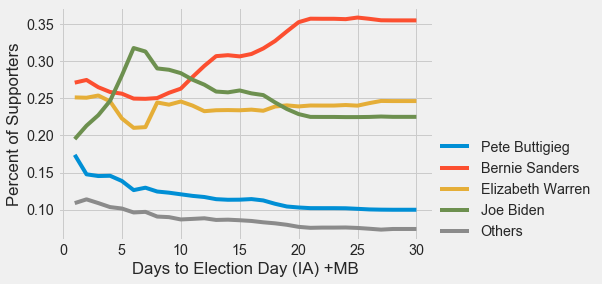

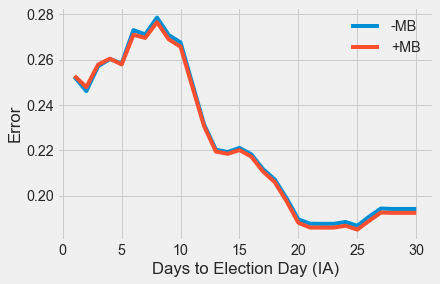

In [82]:
plot_error_t0("IA")

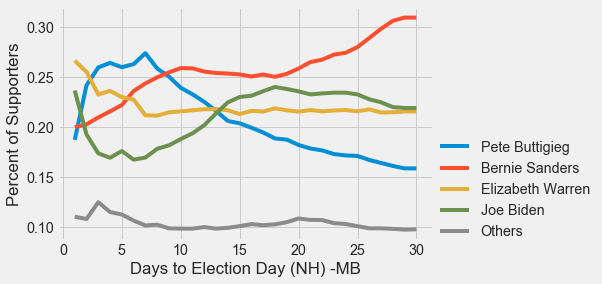

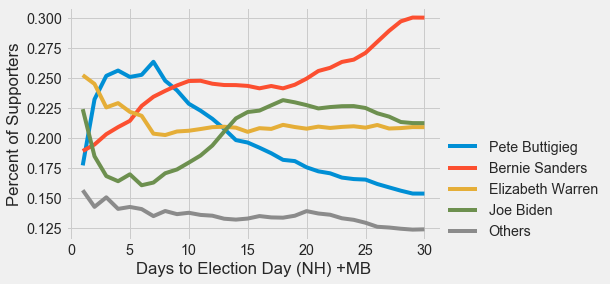

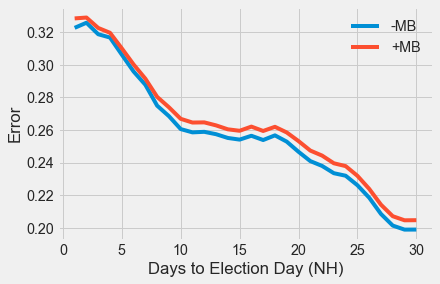

In [83]:
plot_error_t0("NH")

      Pete Buttigieg  Bernie Sanders  Elizabeth Warren  Joe Biden  Others
days                                                                     
1                211             767               453        202      62
2                369            1181               972        329     153
3                504            1402              1056        379     176
4                534            1586              1089        442     202
5                594            1688              1114        507     212
6                645            1771              1150        613     254
7                687            1864              1184        684     287
8                721            1988              1240        686     293
9                818            2116              1275        705     304
10               884            2333              1359        739     339
11               896            2398              1360        789     356
12               946            2428  

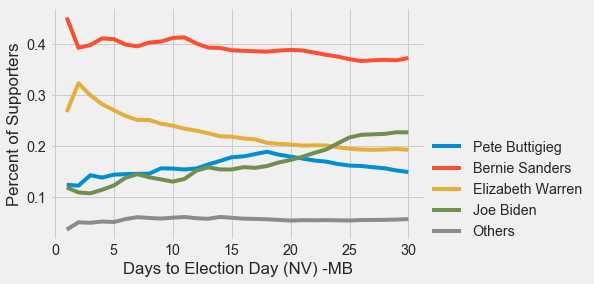

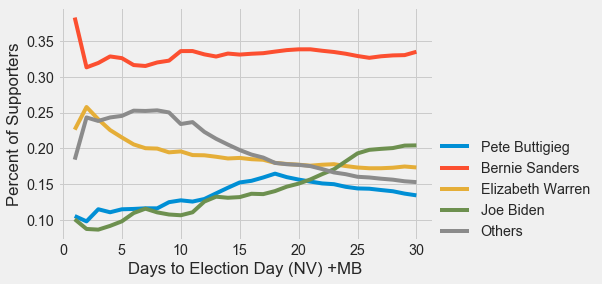

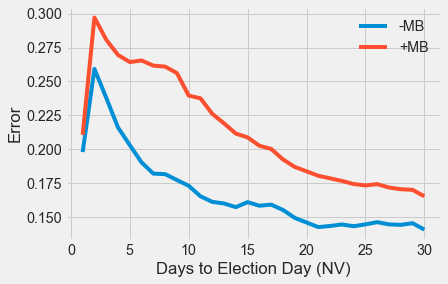

In [92]:
plot_error_t0("NV")